# Import packages

As usual, we import `pandas`.

In [1]:
# import packages
import pandas as pd

# Set some jupyter display options
from IPython.display import display
pd.options.display.max_columns = None

# Preprocess prices

First load our previously-saved file.

In [2]:
prices = pd.read_csv('output/prices.csv', sep=';')

In [3]:
prices.head()

,cp,id,latitude,longitude,maj,nom,pop,valeur
0,1000,1000001,4620114.0,519791.0,2019-01-04T10:53:48,Gazole,R,1328.0
1,1000,1000001,4620114.0,519791.0,2019-01-07T10:25:25,Gazole,R,1348.0
2,1000,1000001,4620114.0,519791.0,2019-01-10T08:54:28,Gazole,R,1374.0
3,1000,1000001,4620114.0,519791.0,2019-01-11T10:01:54,Gazole,R,1387.0
4,1000,1000001,4620114.0,519791.0,2019-01-14T11:04:53,Gazole,R,1394.0


In [5]:
prices.dtypes

cp             int64
id             int64
latitude     float64
longitude    float64
maj           object
nom           object
pop           object
valeur       float64
dtype: object

We see that some fields that were read as strings for the XML file, are now typed as numbers (`id`, `latitude`, `longitude`, `cp`, `valeur`), although there is no provision for such metadata in the CSV format. This happens because Pandas, by default, will try to detect the actual type of the columns. "*If all values from `id` look like numbers, then the column is a number*."

## Extract information from the `maj` date

The type trick above doesn't work automagically with timestamps (`maj`). This is because timestamps can come in a wide variety of formats, and checking each of them on a big amount of values would take too much time. So we do our operations not on the column itself, but on the result of casting it to `datetime`. This way we can use the `.dt` accessor, which works like `.str` but provides date & time-related operations on the series.

In [6]:
prices['date'] = pd.to_datetime(prices['''###CODE HERE###''']).dt.date
prices['weekday'] = pd.to_datetime(prices['date']).dt.weekday_name

We don't need `maj` any more, drop the column altogether. The `inplace` parameter tells Pandas to alter the data frame in memory, instead of making a copy, modifying and returning it. We save some space in memory, but if you mess up your code, you have no way of rolling back except by restarting the process from scratch: load from disk, etc.

In [7]:
prices.drop('''###CODE HERE###''', axis=1, inplace=True)

## Handling missing values

Some data is missing, because it was not in the XML files (blank fields for example). Sometimes we can live with it, sometimes we'll want to remove any incomplete record. This is the route we'll take now.

First, let's see how many missing values there are, per column.

Our data frame is a collection of cells with values, one per (index, column) intersection. The `.isnull()` operator checks each cell and returns `True` if it is empty, `False` otherwise. The result is a data frame with the same index & column list as the original, but with boolean values inside.

In [8]:
prices.isnull()

,cp,id,latitude,longitude,nom,pop,valeur,date,weekday
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In order to count the missing values, we can sum the boolean data frame above, column-wise. When it comes to turning booleans into numbers, `True` is equivalent to 1 and `False` to 0, so that will work. The "column-wise" part comes from the `axis=0` parameter we give to `.sum()`. By giving `axis=1` we would have summed row-wise (try it!). Actually, thre parameter could be omitted because 0 is the default axis. But it's a good idea to specify it anyway, for legibility reasons.

In [9]:
prices.isnull().sum(axis=0)

cp              0
id              0
latitude       69
longitude      68
nom          3172
pop             0
valeur       3172
date         3172
weekday      3172
dtype: int64

There we have it. Let's compare with the size of the data frame. For a data frame, the first element of `.shape` is the number of rows (size of the index), the second one the number of columns.

NB: since we're only interested in the number of rows, we could use `len(prices)` as well

In [10]:
prices.shape

(1019365, 9)

In [11]:
# If we want the *percentage* of missing values:
100. * prices.isnull().sum(axis=0) / '''###CODE HERE###'''

cp           0.000000
id           0.000000
latitude     0.006769
longitude    0.006671
nom          0.311174
pop          0.000000
valeur       0.311174
date         0.311174
weekday      0.311174
dtype: float64

Now that we know we're not going to lose too much information, let's remove the rows with missing values. Again, note the use of `inplace=True` and the need to be 200% sure we do it right, there's no turning back!

In [12]:
prices.dropna(inplace=True)

In [13]:
# Check the new shape
prices.shape

(1016193, 9)

## Rescaling numbers

Some fields were given in an usual scale, which could prevent us from interpreting them correctly later on. Let's rescale them.

In [15]:
# This is another example of in-place modification: the original values are lost
prices['latitude'] /= 100000
prices['longitude'] /= 100000
prices['valeur'] /= 1000

## Data quality considerations

The documentation of the XML file states that `pop` can be either `'A'` or `'R'`. Is it true?

The `.value_counts()` operation on a series is very useful: it gives us the list of values encountered, along with their number of occurrences. It's a easy way to spot anomalies in the distribution or in the values themselves.

In [16]:
prices['pop'].value_counts()

R    936300
A     79870
N        23
Name: pop, dtype: int64

We won't be able to make anything out of the `'N'` values, we can't interpret them. So we drop them, there are not many anyway.

For this, we are going to use the `[...]` data frame operator. When fed with a boolean series, it *selects* only those records for which the boolean value is true.

NB: if you're interested, under the cover the boolean series and the data frame are matched thanks to the index (you don't want to filter records randomly). If the boolean series is derived from the data frame itself, then it inherits its index and the matching is straightforward.

In [17]:
# Here again, we overwrite the `price` variable with the result of a selection. Use with caution
prices = prices[prices['pop'] != '''###CODE HERE###''']

In [18]:
prices.shape

(1016170, 9)

Now change the nomenclature of the `pop` values, to make things clearer. There are lots of way to do this, here is one.

In [19]:
prices['pop'] = prices['pop'].replace({'A': 'Highway', 'R': 'Road'})

## Zip codes & departments

If we use PowerBI to visualize the data on maps, the zip code is not appropriate. PowerBI will not interpret it correctly. Instead, we must use the convention `FR,<department number>`. We'll assume that the department number is the zip code divided by 1,000.

We decide to keep the zip code along with the new field, because we may need to display it on tabular reports.

In [22]:
prices['department_pointer'] = 'FR,' + (('''###CODE HERE###''').astype(int)).astype(str)

## Check for duplicates

Remembering we have removed the time portion of the dates, we might wonder if there are duplicates introduced by the loss of precision. The good approach to check this is to do a **group by**. The `.groupby()` method takes a column name (or a list thereof) and offers operations that we can perform on the groups thus formed.

In [23]:
# Create the group by object first
grouped_by_station_date_and_type = prices.groupby(['''###CODE HERE###'''])

In [24]:
# Count the records in each group, and display the entries for which the count is > 1
counts_by_station_date_and_type = grouped_by_station_date_and_type.size()
counts_by_station_date_and_type[counts_by_station_date_and_type > 1].sort_values(ascending=False)

id        date        nom   
6211001   2019-01-04  GPLc      38
                      Gazole    38
                      SP98      38
                      E10       38
21120001  2019-02-19  Gazole    31
                      SP98      30
                      SP95      30
33210001  2019-01-07  E10       26
                      Gazole    26
                      SP98      26
67033001  2019-01-02  Gazole    21
                      E10       21
                      GPLc      21
                      SP98      21
83500001  2019-01-09  Gazole    19
                      SP98      19
                      E10       19
          2019-01-11  SP98      17
                      Gazole    17
                      E10       17
31150001  2019-01-04  SP95      14
                      Gazole    14
                      E10       14
                      E85       14
                      GPLc      14
83500001  2019-01-07  E10       12
                      SP98      12
31150001  2019-01-16  E85 

So there is a fairly high number of duplicates! The result is conveniently indexed by our group by list.

In [33]:
# For example the biggest group:
# Note that our search criterion is the combination (`&`) of 2 conditions
import datetime

prices[
    (prices['id'] == 6211001) &
    (prices['date'] == datetime.date(2019, 1, 4)) &
    (prices['nom'] == 'E10')
]

,cp,id,latitude,longitude,nom,pop,valeur,date,weekday,department_pointer
38362,6210,6211001,43.533633,6.933755,E10,Road,1.329,2019-01-04,Friday,"FR,6"
38363,6210,6211001,43.533633,6.933755,E10,Road,1.329,2019-01-04,Friday,"FR,6"
38364,6210,6211001,43.533633,6.933755,E10,Road,1.329,2019-01-04,Friday,"FR,6"
38365,6210,6211001,43.533633,6.933755,E10,Road,1.329,2019-01-04,Friday,"FR,6"
38366,6210,6211001,43.533633,6.933755,E10,Road,1.329,2019-01-04,Friday,"FR,6"
38367,6210,6211001,43.533633,6.933755,E10,Road,1.329,2019-01-04,Friday,"FR,6"
38368,6210,6211001,43.533633,6.933755,E10,Road,1.329,2019-01-04,Friday,"FR,6"
38369,6210,6211001,43.533633,6.933755,E10,Road,1.329,2019-01-04,Friday,"FR,6"
38370,6210,6211001,43.533633,6.933755,E10,Road,1.329,2019-01-04,Friday,"FR,6"
38371,6210,6211001,43.533633,6.933755,E10,Road,1.329,2019-01-04,Friday,"FR,6"


A quick lookup in the XML file will confirm that the duplicates don't come from a bug in our code: for this station there are actual price entries that are minutes or even seconds apart, which is weird!

In order to cope for this (and reduce the size of our data), we'll take the first entry of each group. Another approach would be to average the prices, in case they were different *inside* a group.

In [34]:
# Try this first
grouped_by_station_date_and_type.first()

cp  latitude  longitude   pop  valeur  \
id       date       nom                                                
1000001  2019-01-04 Gazole   1000  46.20114    5.19791  Road   1.328   
                    SP95     1000  46.20114    5.19791  Road   1.375   
                    SP98     1000  46.20114    5.19791  Road   1.399   
         2019-01-07 Gazole   1000  46.20114    5.19791  Road   1.348   
                    SP95     1000  46.20114    5.19791  Road   1.387   
                    SP98     1000  46.20114    5.19791  Road   1.409   
         2019-01-10 Gazole   1000  46.20114    5.19791  Road   1.374   
                    SP95     1000  46.20114    5.19791  Road   1.395   
                    SP98     1000  46.20114    5.19791  Road   1.425   
         2019-01-11 Gazole   1000  46.20114    5.19791  Road   1.387   
                    SP95     1000  46.20114    5.19791  Road   1.410   
                    SP98     1000  46.20114    5.19791  Road   1.434   
         2019-01-14 Gazole   1000  46.20114    5.19791  Road   1.394   
                    SP95     1000  46.20114    5.19791  Road   1.415   
                    SP98     1000  46.20114    5.19791  Road   1.439   
         2019-01-16 Gazole   1000  46.20114    5.19791  Road   1.394   
                    SP95     1000  46.20114    5.19791  Road   1.410   
                    SP98     1000  46.20114    5.19791  Road   1.435   
         2019-01-17 Gazole   1000  46.20114    5.19791  Road   1.391   
                    SP95     1000  46.20114    5.19791  Road   1.410   
                    SP98     1000  46.20114    5.19791  Road   1.435   
         2019-01-18 Gazole   1000  46.20114    5.19791  Road   1.401   
                    SP95     1000  46.20114    5.19791  Road   1.410   
                    SP98     1000  46.20114    5.19791  Road   1.437   
         2019-01-21 Gazole   1000  46.20114    5.19791  Road   1.401   
                    SP95     1000  46.20114    5.19791  Road   1.413   
                    SP98     1000  46.20114    5.19791  Road   1.437   
         2019-01-23 Gazole   1000  46.20114    5.19791  Road   1.408   
                    SP95     1000  46.20114    5.19791  Road   1.425   
                    SP98     1000  46.20114    5.19791  Road   1.459   
...                           ...       ...        ...   ...     ...   
95870009 2019-03-22 E10     95870  48.92800    2.21300  Road   1.446   
                    Gazole  95870  48.92800    2.21300  Road   1.466   
                    SP98    95870  48.92800    2.21300  Road   1.534   
         2019-03-23 E10     95870  48.92800    2.21300  Road   1.458   
                    Gazole  95870  48.92800    2.21300  Road   1.465   
                    SP98    95870  48.92800    2.21300  Road   1.549   
         2019-03-24 E10     95870  48.92800    2.21300  Road   1.458   
                    Gazole  95870  48.92800    2.21300  Road   1.465   
                    SP98    95870  48.92800    2.21300  Road   1.549   
         2019-03-25 E10     95870  48.92800    2.21300  Road   1.458   
                    Gazole  95870  48.92800    2.21300  Road   1.465   
                    SP98    95870  48.92800    2.21300  Road   1.549   
         2019-03-26 E10     95870  48.92800    2.21300  Road   1.469   
                    Gazole  95870  48.92800    2.21300  Road   1.466   
                    SP98    95870  48.92800    2.21300  Road   1.559   
         2019-03-27 E10     95870  48.92800    2.21300  Road   1.479   
                    Gazole  95870  48.92800    2.21300  Road   1.465   
                    SP98    95870  48.92800    2.21300  Road   1.562   
         2019-03-28 E10     95870  48.92800    2.21300  Road   1.479   
                    Gazole  95870  48.92800    2.21300  Road   1.465   
                    SP98    95870  48.92800    2.21300  Road   1.562   
         2019-03-29 E10     95870  48.92800    2.21300  Road   1.482   
                    Gazole  95870  48.92800    2.21300  Road   1.465   

We get the expected result, but it is still indexed by the group by list (it looks like a pivot table in Excel). We want to "flatten" it and make the index normal columns again. For this the `.reset_index()` method comes in handy.

In [35]:
prices = grouped_by_station_date_and_type.first().reset_index()
prices.head()

,id,date,nom,cp,latitude,longitude,pop,valeur,weekday,department_pointer
0,1000001,2019-01-04,Gazole,1000,46.20114,5.19791,Road,1.328,Friday,"FR,1"
1,1000001,2019-01-04,SP95,1000,46.20114,5.19791,Road,1.375,Friday,"FR,1"
2,1000001,2019-01-04,SP98,1000,46.20114,5.19791,Road,1.399,Friday,"FR,1"
3,1000001,2019-01-07,Gazole,1000,46.20114,5.19791,Road,1.348,Monday,"FR,1"
4,1000001,2019-01-07,SP95,1000,46.20114,5.19791,Road,1.387,Monday,"FR,1"


## Renaming columns

The original column names are not very useful. We do some cleaning on that part as well.

In [36]:
prices = prices.rename(columns={
    'id': 'station_id',
    'cp': 'zip_code',
    'pop': 'location_type',
    'nom': 'gas_type',
    'valeur': 'price'
})

In [37]:
# Let's have a look at our final prices dateset
prices.head()

,station_id,date,gas_type,zip_code,latitude,longitude,location_type,price,weekday,department_pointer
0,1000001,2019-01-04,Gazole,1000,46.20114,5.19791,Road,1.328,Friday,"FR,1"
1,1000001,2019-01-04,SP95,1000,46.20114,5.19791,Road,1.375,Friday,"FR,1"
2,1000001,2019-01-04,SP98,1000,46.20114,5.19791,Road,1.399,Friday,"FR,1"
3,1000001,2019-01-07,Gazole,1000,46.20114,5.19791,Road,1.348,Monday,"FR,1"
4,1000001,2019-01-07,SP95,1000,46.20114,5.19791,Road,1.387,Monday,"FR,1"


# Merge with list of stations

Now we are ready to load and match with the list of stations.

In [39]:
stations = pd.read_csv('output/stations_with_coordinates.csv', sep=';')
stations.head()

,Identifiant,Marque,Nom,Latitude,Longitude
0,21360004,Avia,AVIA Creux Moreau,47.37861,4.38168
1,27600003,Elan,GARAGE POUPARDIN,49.14759,1.33189
2,27310003,Carrefour Market,Carrefour Market,49.35606,0.81532
3,29200009,Intermarché,INTERMARCHE BREST CEDEX 2,48.40238,-4.47910
4,29420001,Système U,Super U PLOUENAN,48.62827,-3.98804


Again, some renaming. Note that latitude and longitude are prefixed with `ref_` (for *referential*) in order to avoid confusion with the columns from the `prices` data frame.

In [40]:
# Notice we don the operation in place here. Tastes...
stations.rename(columns={
    'Identifiant': 'station_id',
    'Marque': 'brand',
    'Nom': 'name',
    'Latitude': 'ref_latitude',
    'Longitude': 'ref_longitude'
}, inplace=True)

The actual merging operation. Unlike before, we don't merge on data frame indices, which are unrelated because the data comes from completely different sources. Instead, we merge on **columns** whose (common) name is passed as the `on=` parameter.

This is a **left** join, meaning that we expect some matches to fail. When a match succeeds, the data frame is enriched with information coming from the `stations` data frame. Otherwise, the corresponding information will be blank, meaning that the `station_id` of a price record could not be found in `stations`.

In [41]:
prices_with_stations = pd.merge(prices, stations, on='''###CODE HERE###''', how='left')

In [42]:
prices_with_stations.head()

,station_id,date,gas_type,zip_code,latitude,longitude,location_type,price,weekday,department_pointer,brand,name,ref_latitude,ref_longitude
0,1000001,2019-01-04,Gazole,1000,46.20114,5.19791,Road,1.328,Friday,"FR,1",Carrefour Market,Carrefour Market,46.20114,5.19791
1,1000001,2019-01-04,SP95,1000,46.20114,5.19791,Road,1.375,Friday,"FR,1",Carrefour Market,Carrefour Market,46.20114,5.19791
2,1000001,2019-01-04,SP98,1000,46.20114,5.19791,Road,1.399,Friday,"FR,1",Carrefour Market,Carrefour Market,46.20114,5.19791
3,1000001,2019-01-07,Gazole,1000,46.20114,5.19791,Road,1.348,Monday,"FR,1",Carrefour Market,Carrefour Market,46.20114,5.19791
4,1000001,2019-01-07,SP95,1000,46.20114,5.19791,Road,1.387,Monday,"FR,1",Carrefour Market,Carrefour Market,46.20114,5.19791


Let's see the effect of the left join:

In [43]:
prices_with_stations[prices_with_stations['brand'].isnull()].head()

,station_id,date,gas_type,zip_code,latitude,longitude,location_type,price,weekday,department_pointer,brand,name,ref_latitude,ref_longitude
729,1000013,2019-01-01,E10,1000,46.198518,5.243506,Road,1.319,Tuesday,"FR,1",NaN,NaN,NaN,NaN
730,1000013,2019-01-01,Gazole,1000,46.198518,5.243506,Road,1.347,Tuesday,"FR,1",NaN,NaN,NaN,NaN
731,1000013,2019-01-01,SP98,1000,46.198518,5.243506,Road,1.409,Tuesday,"FR,1",NaN,NaN,NaN,NaN
732,1000013,2019-01-02,E10,1000,46.198518,5.243506,Road,1.319,Wednesday,"FR,1",NaN,NaN,NaN,NaN
733,1000013,2019-01-02,Gazole,1000,46.198518,5.243506,Road,1.347,Wednesday,"FR,1",NaN,NaN,NaN,NaN


Since our data set will be used for visualization, it is better to replace the blanks with a more human-friendly value. We don't touch `ref_latitude` and `ref_longitude`, they are numeric fields and there is no meaningful value to substitute with.

In [44]:
prices_with_stations = prices_with_stations.fillna(value={
    'brand': 'Unknown',
    'name': 'Unknown'
})

In [45]:
# A quick check
prices_with_stations[prices_with_stations['brand'].isnull()].head()

,station_id,date,gas_type,zip_code,latitude,longitude,location_type,price,weekday,department_pointer,brand,name,ref_latitude,ref_longitude


In [46]:
# A quick check (bis)
prices_with_stations[prices_with_stations['brand'] == 'Unknown'].head()

,station_id,date,gas_type,zip_code,latitude,longitude,location_type,price,weekday,department_pointer,brand,name,ref_latitude,ref_longitude
729,1000013,2019-01-01,E10,1000,46.198518,5.243506,Road,1.319,Tuesday,"FR,1",Unknown,Unknown,NaN,NaN
730,1000013,2019-01-01,Gazole,1000,46.198518,5.243506,Road,1.347,Tuesday,"FR,1",Unknown,Unknown,NaN,NaN
731,1000013,2019-01-01,SP98,1000,46.198518,5.243506,Road,1.409,Tuesday,"FR,1",Unknown,Unknown,NaN,NaN
732,1000013,2019-01-02,E10,1000,46.198518,5.243506,Road,1.319,Wednesday,"FR,1",Unknown,Unknown,NaN,NaN
733,1000013,2019-01-02,Gazole,1000,46.198518,5.243506,Road,1.347,Wednesday,"FR,1",Unknown,Unknown,NaN,NaN


The only thing left is to save the result.

In [47]:
prices_with_stations.to_csv('output/prices_with_stations.csv', sep=';', index=False)

# Bonus track: check the consistency of the coordinates

Remember we have 2 sets of coordinates: one coming from `stations`, and one from `prices`. Are they identical? After all, the station ID's are the same (we could merge on them) so we could assume that the coordinates come from a common database. However...

In [48]:
# We will use NumPy, which provides efficient implementations of mathematical functions
import numpy as np

# We will make some plots. Tell Jupyter to display them inline with the notebook
%matplotlib inline

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [50]:
def distance(row):
    # Use the haversine formula (https://www.movable-type.co.uk/scripts/latlong.html)
    # The distance is returned in km
    lat1, lat2 = np.pi * row.latitude / 180., np.pi * row.ref_latitude / 180.
    d_lat = lat1 - lat2
    d_long = np.pi * (row.longitude - row.ref_longitude) / 180.
    a = np.sin(d_lat / 2.)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(d_long / 2.)**2
    c = 2. * np.arctan2(np.sqrt(a), np.sqrt(1. - a))
    return 6371. * c

# Our prices_with_stations dataset is big, but in the end we're only interested in the stations themselves, whose
# attributes are repeated for every date. So we just take one record per station
stations_from_prices = prices_with_stations.groupby('station_id').first()

# Compute distances, and remove null values (they happen when coordinates are missing, because of the left join)
discrepancies = stations_from_prices.apply(distance, axis=1).dropna()
discrepancies.sort_values(ascending=False).head(20)

station_id
20213004    850.243430
41500001    354.111842
81500005    275.676165
33720007    165.865203
51400008    147.883493
51400007    147.877235
86220003    143.083108
5350001     112.601381
76890001     60.674078
14520003     45.521352
33410003     35.848621
91410004     31.249518
77515001     13.058104
43500001     13.004602
69220005     12.458579
94012001     12.079426
78680002     10.693308
70400001     10.672187
42030001      9.482122
85600002      8.962123
dtype: float64

So the discrepancy can be as high as 850 km! Note that because of the `groupby` operation, the `discrepancies` series is indexed by the `station_id`, which is convenient. Hence the biggest discrepancy is for station 20213004.

In [51]:
# `.iloc[0]` means take the first record that comes out of the query
prices_with_stations[prices_with_stations['station_id'] == 20213004].iloc[0]

station_id                    20213004
date                        2019-02-18
gas_type                        Gazole
zip_code                         20213
latitude                        42.445
longitude                        9.508
location_type                     Road
price                             1.48
weekday                         Monday
department_pointer               FR,20
brand                             VITO
name                  Station SARL AGC
ref_latitude                   49.5041
ref_longitude                  5.26738
Name: 148128, dtype: object

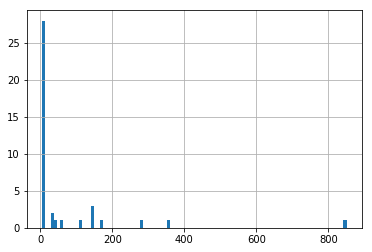

In [52]:
# A quick overview of the distribution of the discrepancies
# We only consider those that are higher than 5 km, otherwise the plot is squashed by the high number of smaller ones
discrepancies[discrepancies > 5].hist(bins=100)